# **Minigrid Solver with PDDL Planning**

The following notebook runs the PDDL domain and problem scripts to solve a Minigrid environment which I developed for my class on Artificial Intelligence at the Free University of Bolzano/Bozen.

In this enviroment, the agent must remove the ball blocking the door, pick up the key to unlock the door, find its way to the box, and pick it up.

To view the PDDL scripts, reference *minigrid-problem.pddl* (problem file) and *minigrid-domain.pddl* (domain file).

In [ ]:
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt

import unified_planning.shortcuts as up
from unified_planning.io import PDDLReader

In [ ]:
## Environment ##
name: ailab-minigrid
channels:
  - pytorch
  - conda-forge
  - nodefaults
dependencies:
  - python >3.8,<3.12
  - networkx
  # JupyterLab and plugins
  - jupyterlab
  - jupyterlab-git
  - jupytext
  # Gymnasium RL framework and training examples
  - gymnasium-other
  - stable-baselines3
  # required by minigrid
  - pygame
  - pip:
      - minigrid
      - unified_planning[fast-downward]

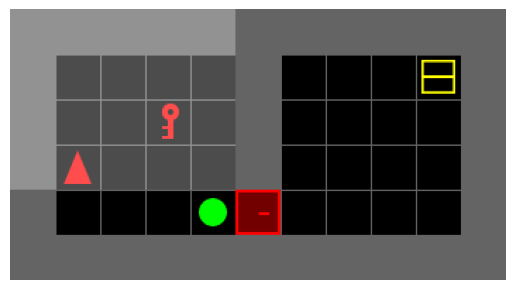

In [2]:
## Visualization of the Minigrid Problem Environment ##
env = gym.make("MiniGrid-BlockedUnlockPickup-v0", render_mode='rgb_array')

env.reset(seed=1234)
plt.axis('off')
plt.imshow(env.render());

For the agent to solve the mission, it had to be equiped with the following action types:

1) *move* - allows the agent to move to an adjacent cell as long as it is not blocked by an object or locked by a door.
2) *pick* - allows the agent to pick up objects and hold them. Objects include balls and boxes.
3) *pick-key* - allows the agent to pick up key objects, since key objects belong to a unique class capable of unlocking locked cells.
4) *drop* - allows the agent to drop held objects.
5) *drop-key* - allows the agent to drop held key objects.
6) *unlock* - allows the agent to unlocks doors, i.e. locked cells.

Each cell had to be bidirectionally connected so that the agent is able to move back and forth; the agent was equipped with an ability to hold objects; and finally, the cells were flagged as either blocked, if there was an object, or locked, if there was a door.

The following code exhibits the agent's series of actions to move from the starting position, remove the ball blocking the door, pick up the key, unlock the door, move to the box, and pick it up.

In [3]:
## Calculating the Plan from the PDDL Domain and Problem Files ##
problem = PDDLReader().parse_problem(domain_filename='minigrid-domain.pddl', problem_filename= 'minigrid-problem.pddl')

with up.OneshotPlanner(problem_kind=problem.kind) as planner:
    result = planner.solve(problem)

print(f'Plan ({result.plan.kind}):')
for i, action in enumerate(result.plan.actions, start=1):
    print(f'{i}: {str(action.action.name)} [{",".join(str(p) for p in action.actual_parameters)}]')

NOTE: To disable printing of planning engine credits, add this line to your code: `up.shortcuts.get_environment().credits_stream = None`
  *** Credits ***
  * In operation mode `OneshotPlanner` at line 3 of `/tmp/ipykernel_8330/831670946.py`, you are using the following planning engine:
  * Engine name: Fast Downward
  * Developers:  Uni Basel team and contributors (cf. https://github.com/aibasel/downward/blob/main/README.md)
  * Description: Fast Downward is a domain-independent classical planning system.

Plan (PlanKind.SEQUENTIAL_PLAN):
1: move [agent1,cell1_2,cell2_2]
2: move [agent1,cell2_2,cell2_1]
3: move [agent1,cell2_1,cell3_1]
4: pick [agent1,ball1,cell3_1,cell4_1]
5: move [agent1,cell3_1,cell4_1]
6: drop [agent1,ball1,cell4_1,cell3_1]
7: move [agent1,cell4_1,cell4_2]
8: move [agent1,cell4_2,cell4_3]
9: pick-key [agent1,key1,cell4_3,cell3_3]
10: move [agent1,cell4_3,cell4_2]
11: move [agent1,cell4_2,cell4_1]
12: unlock [agent1,key1,cell4_1,cell5_1]
13: move [agent1,cell4_1,ce